<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Small-Graph---NetworkX" data-toc-modified-id="Small-Graph---NetworkX-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Small Graph - NetworkX</a></span></li><li><span><a href="#Large-Graph---Other-Packages" data-toc-modified-id="Large-Graph---Other-Packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Large Graph - Other Packages</a></span><ul class="toc-item"><li><span><a href="#Node-Layout:-ForceAtlas2" data-toc-modified-id="Node-Layout:-ForceAtlas2-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Node Layout: ForceAtlas2</a></span></li><li><span><a href="#Edge-Curve" data-toc-modified-id="Edge-Curve-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Edge Curve</a></span></li></ul></li><li><span><a href="#Community-Detection" data-toc-modified-id="Community-Detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Community Detection</a></span><ul class="toc-item"><li><span><a href="#Results-Visualisation" data-toc-modified-id="Results-Visualisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Results Visualisation</a></span><ul class="toc-item"><li><span><a href="#Permuted-Adjacency-Matrix-[Recall]" data-toc-modified-id="Permuted-Adjacency-Matrix-[Recall]-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Permuted Adjacency Matrix [Recall]</a></span></li><li><span><a href="#Graph-Visualisation" data-toc-modified-id="Graph-Visualisation-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Graph Visualisation</a></span></li><li><span><a href="#Gephi-[Software]" data-toc-modified-id="Gephi-[Software]-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Gephi [Software]</a></span></li></ul></li><li><span><a href="#Temporal-Analysis" data-toc-modified-id="Temporal-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Temporal Analysis</a></span><ul class="toc-item"><li><span><a href="#Permuted-Adjacency-Matrix-[Recall]" data-toc-modified-id="Permuted-Adjacency-Matrix-[Recall]-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Permuted Adjacency Matrix [Recall]</a></span></li><li><span><a href="#Sankey-Diagram" data-toc-modified-id="Sankey-Diagram-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Sankey Diagram</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Small Graph - NetworkX

Using NetworkX to visualize a small graph is a convenient option, as it allows for easy customization of various parameters. We can either use a single function `nx.draw_networkx`[[doc]](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) or use two functions `nx.draw_networkx_nodes`[[doc]](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html) and `nx.draw_networkx_edges`[[doc]](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html) to draw nodes and edges separately. We will present the latter case here as it allows for more parameters. 

Some of the commonly used parameters in these two functions include:

- **Node Level**: `nx.draw_networkx_nodes(...)`
    - `pos`: A dictionary with nodes as keys and positions as values. Some available options in NetworkX are [[doc]](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_agraph.graphviz_layout.html):
        - `nx.circular_layout(G)`
        - `nx.spring_layout(G)`
        - `nx.spectral_layout(G)`
        - `nx.spiral_layout(G)`
        - `nx.nx_agraph.graphviz_layout(G)`
        - `nx.nx_agraph.graphviz_layout(G, prog= 'dot')`
        - `nx.kamada_kawai_layout(G)`
        - `nx.planar_layout(G)`
        - `nx.random_layout(G, seed = 111)` (seed can be manually adjusted or deleted)
        - `nx.fruchterman_reingold_layout(G)`
       
    - `node_color`: This can be a single color or a sequence of colors with the same length as the nodes in G.
    - `node_size`: This can be a single size or a sequence of sizes with the same length as the nodes in G.
    - `alpha`: The node transparency. This can be a single alpha value or a sequence of alpha values with the same length as the nodes in G.
    - `linewidth`: The linewidth of node borders. This can be a single width or a sequence of widths with the same length as the nodes in G.
    - `edgecolors`: The colors of node borders. This can be a single color or a sequence of colors with the same length as the nodes in G.

- **Edge Level**: `nx.draw_networkx_edges(...)`
    - `edge_color`: This can be a single color or a sequence of colors with the same length as the edges in G.
    - `width`: Line width of edges. This can be a single width or a sequence of widths with the same length as the edges in G.
    - `alpha`: The edge transparency. This can be a single alpha value or a sequence of alpha values with the same length as the edges in G.

For demonstration, we create a directed weighted graph containing 8 nodes and 9 edges as an example. Note that apart from the basic two functions `nx.draw_networkx_nodes` and `nx.draw_networkx_edges`, here we also present **labels** for nodes and edges, as well as a **colormap** for node colors. Following the similar steps, you can produce a colormap for edge colors as well. 
- Each node in the graph is labeled with its name and its size is proportional to its node degree, which is the sum of its outdegree and indegree. Additionally, the color of each node indicates its degree, with darker shades representing higher degrees.
- Each edge is labeled with its weight and the transparency of each edge is proportional to its weight.

In [3]:
def small_graph_plot(G, pos, save = None):
    
    fig = plt.figure(figsize=(8,8))

    # node
    node_degree = np.array(list(dict(G.degree).values()))
    node_size = node_degree * 400
    node_plot = nx.draw_networkx_nodes(
        G, 
        node_color = node_degree, 
        node_size = node_size,
        linewidths = 1,
        edgecolors = 'k',
        alpha = 1, 
        cmap = 'Reds', 
        pos = pos
    )
    cmap = fig.colorbar(node_plot); cmap.ax.tick_params(labelsize = 12); cmap.ax.set_title('Node Degree', fontsize = '12')

    # edge
    edge_alpha = np.array(list(nx.get_edge_attributes(G,'weight').values()))
    edge_alpha = edge_alpha/np.max(edge_alpha)
    nx.draw_networkx_edges(
        G, 
        edge_color = 'grey', 
        width = 3, 
        alpha = edge_alpha,
        pos = pos, 
        node_size = node_size,
        arrowstyle="->",              # for directed graph
        arrowsize = 12                # for directed graph      
    )

    # node label
    nx.draw_networkx_labels(G, pos = pos, font_size = 15, font_color = 'k')

    # edge label
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size = 15)

    plt.axis('equal');
    plt.axis('off');
    
    if save:
        plt.savefig(save, transparent = False) # save the figure

In [2]:
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
G.add_weighted_edges_from([('A', 'B', 8), ('A', 'C', 10), ('SB', 'C', 5), ('B', 'E', 12), ('B', 'G', 3), ('E', 'F', 4), ('D', 'E', 11), ('F', 'G', 2), ('B', 'H', 5)])

1. `nx.circular_layout(G)`: it works well.

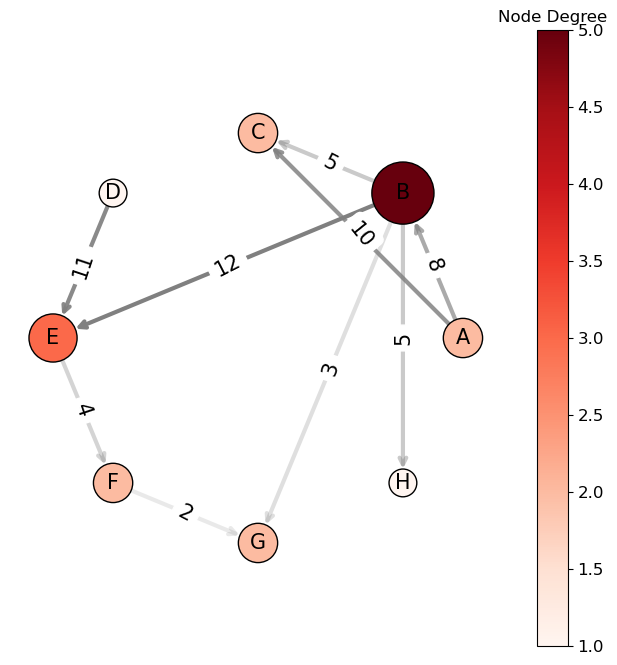

In [4]:
small_graph_plot(G, pos = nx.circular_layout(G), save = 'Figures/small_graph_circular.png')

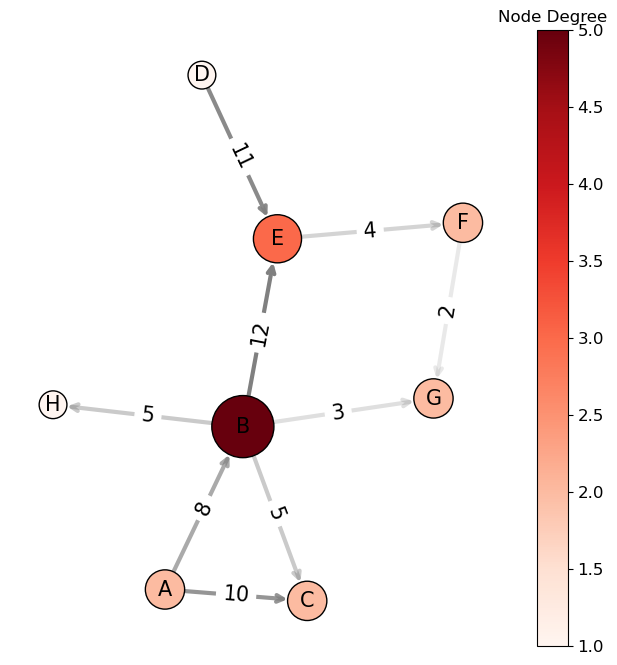

In [5]:
small_graph_plot(G, pos = nx.nx_agraph.graphviz_layout(G), save = 'Figures/small_graph_graphviz.png')

2. `nx.nx_agraph.graphviz_layout(G)`: it works well. 

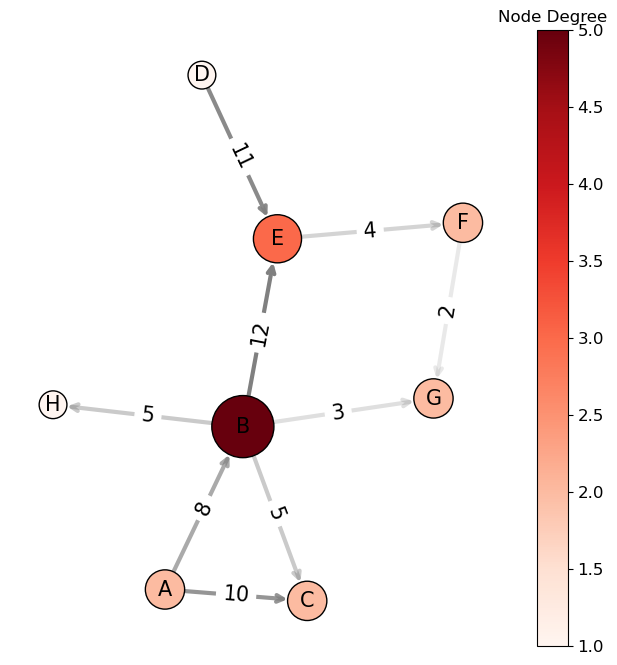

In [6]:
small_graph_plot(G, pos = nx.nx_agraph.graphviz_layout(G), save = 'Figures/small_graph_graphviz.png')

3. `nx.planar_layout(G)`: Not every layout is capable of presenting a clear visualization. Therefore, it is advisable to experiment with different layouts to find the preferrable one.

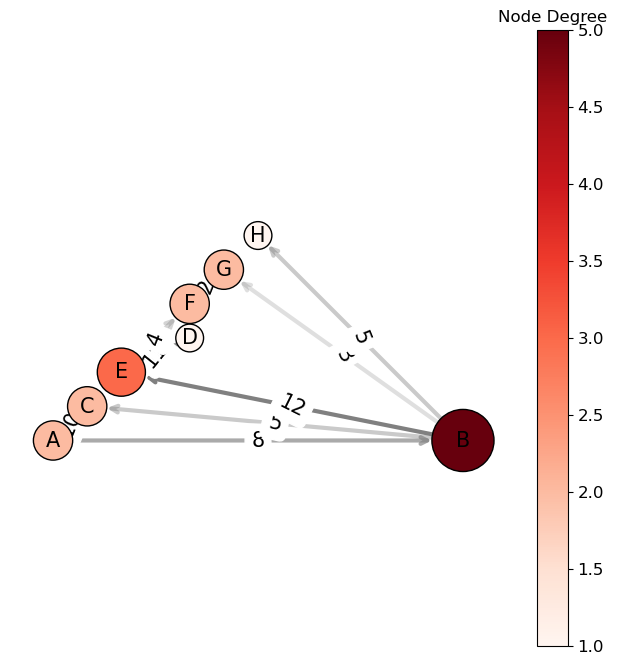

In [7]:
small_graph_plot(G, pos = nx.planar_layout(G), save = 'Figures/small_graph_planar.png')

# Large Graph - Other Packages

When considering large graphs, it will be difficult for us to visualise them using NetworkX alone.

In this section, we will use the temporal dataset that we introduced in the last seminar as an example to demonstrate other packages for visualization [[doc]](http://www.sociopatterns.org/datasets/contacts-in-a-workplace/). Recall that  we preprocessed the dataset and transformed it into three temporal undirected weighted networks: G1, G2, and G3. The 12-day period of the dataset is divided into three parts of four days each, which are represented by each temporal network separately.
- Each network contains the same 92 nodes, representing all individuals involved in this dataset.
- An undirected edge is generated between a pair of individuals in a network if they were in contact during the four-day period. The weight of each edge reflects the duration of contact between the pair of individuals. The total number of edges in the three networks are 476, 217, and 389 respectively, with a sum of edge weights of 3994, 1647, and 4189.

The two subsections, *Node Layout: ForceAtlas2* and *Edge Curve*, will only use G1. The last section, *Community Detection*, will use all three graphs.

Moreover, we introduce the **department** each individual belongs in the workplace and perform **community detection** using modularity maximisation on each graph separately. As a result, we additionally assign two node attributes: "department" and "comm". While the department attribute remains constant for all three graphs, the community assignment will change as time varies. The processing steps are detailed in [Data_Process.ipynb](Data_Process.ipynb).

In [8]:
G1 = nx.read_gpickle("Data/G1.gpickle")
G2 = nx.read_gpickle("Data/G2.gpickle")
G3 = nx.read_gpickle("Data/G3.gpickle")

In [9]:
G1.nodes[513]

{'department': 'DSE', 'comm': 0}

In [10]:
set(nx.get_node_attributes(G1, 'department').values())

{'DISQ', 'DMCT', 'DSE', 'SFLE', 'SRH'}

In [11]:
print(set(nx.get_node_attributes(G1, 'comm').values()))
print(set(nx.get_node_attributes(G2, 'comm').values()))
print(set(nx.get_node_attributes(G3, 'comm').values()))

{0, 1, 2, 3, 4, 5, 6, 7}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


## Node Layout: ForceAtlas2

As observed in Section 1, the node layout is crucial in determining whether a graph is properly visualized. However, algorithms for producing node layouts in NetworkX often fail to do so for large networks. Therefore, we introduce an algorithm that is not included in NetworkX called "ForceAtlas2". ForceAtlas2 is a force-directed graph layout algorithm that is commonly used for visualizing complex networks or graphs. 

One of the advantages of ForceAtlas2 is that it can **handle large-scale networks** with millions of nodes and edges. It also allows for **fine-tuning of various parameters**, such as the strength of the attractive and repulsive forces, to achieve the desired layout. 

However, the result varies depending on the initial state. The process can get stuck in a local minimum. It is **not deterministic**, and the coordinates of each point do not reflect any specific variable. An additional comment to make is that, ForceAtlas **works better for well-connected graphs**.

Here we use a GitHub package [forceatlas2](https://github.com/bhargavchippada/forceatlas2), which, while not extensively used, is quite helpful. 

Installation:`pip install fa2` 

In [12]:
from fa2 import ForceAtlas2
def ForceAtlas2_layout(G):
    forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=False,
                        gravity=1,

                        # Log
                        verbose=True)
    
    positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
    return positions

In [13]:
set(nx.get_node_attributes(G1, 'department').values())

{'DISQ', 'DMCT', 'DSE', 'SFLE', 'SRH'}

In [14]:
def get_node_department_color(department):
    
    color_dict = {'DISQ': '#233d4d', 'DMCT': '#fe7f2d', 'DSE': '#fcca46', 'SFLE': '#a1c181', 'SRH': '#619b8a'}
    
    return color_dict[department]

In [15]:
def plot_with_nodeColorLabel(G, pos, save = False):
    
    fig = plt.figure(figsize=(8,8))
    
    # node
    # draw nodes from different departments separately for legend plotting
    
    department_dict = nx.get_node_attributes(G, 'department')
    for department in list(set(department_dict.values())):
        nodelist = [node for node in G.nodes if department_dict[node] == department]
        nx.draw_networkx_nodes(
            G, 
            node_color = get_node_department_color(department), 
            node_size = 100,
            nodelist = nodelist,
            linewidths = 1,
            edgecolors = 'k',
            alpha = 1, 
            pos = pos,
            label = department
        )

    # edge
    edge_alpha = np.array(list(nx.get_edge_attributes(G,'weight').values()))
    edge_alpha = np.log(edge_alpha + 1); edge_alpha = edge_alpha/np.max(edge_alpha)
    
    #edge_alpha = np.log(edge_alpha + 1.5); edge_alpha = edge_alpha/np.max(edge_alpha)
    nx.draw_networkx_edges(
        G, 
        edge_color = 'k', 
        width = edge_alpha*5, 
        alpha = edge_alpha,
        pos = pos, 
        node_size = 100,
    )

    plt.legend()
    plt.axis('equal');
    plt.axis('off');

    if save:
        plt.savefig(save, transparent = False) # save the figure

1. G1

In [16]:
FA2_position = ForceAtlas2_layout(G1)

100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 3465.95it/s]

BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.33  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


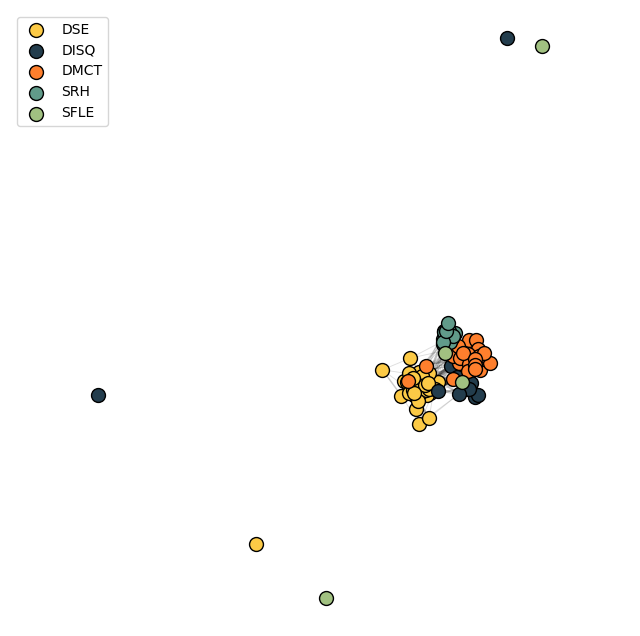

In [17]:
plot_with_nodeColorLabel(G1, pos = FA2_position, save = 'Figures/FA2_G1.png')

By comparisons, the following two figures are visualisations using other layouts instead of ForceAtlas2.

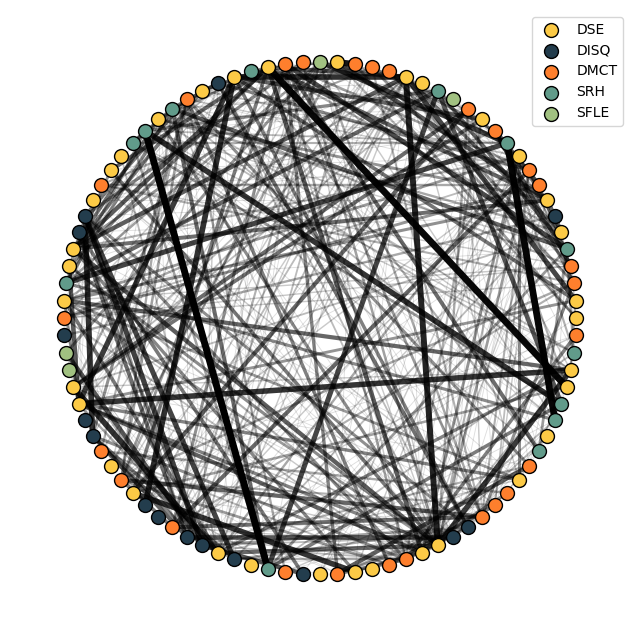

In [18]:
plot_with_nodeColorLabel(G1, pos = nx.circular_layout(G1), save = 'Figures/Circular_G1.png')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


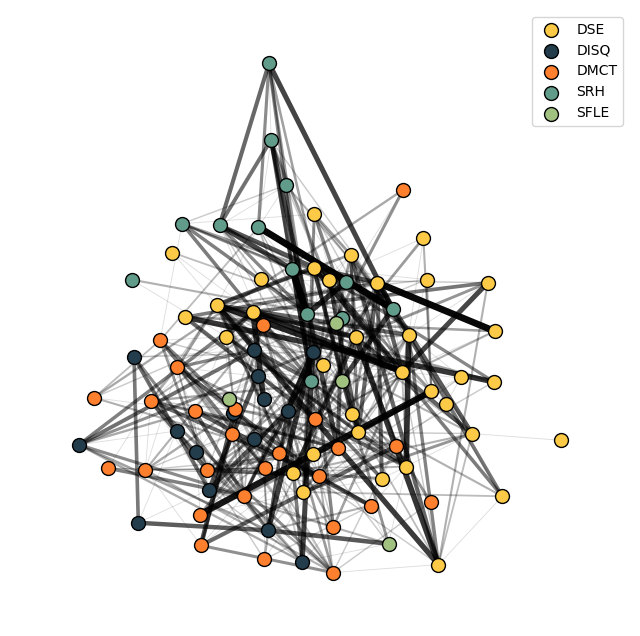

In [19]:
plot_with_nodeColorLabel(G1, pos = nx.kamada_kawai_layout(G1), save = 'Figures/Spectral_G1.png')

2. The largest connected component in G1

In [20]:
G1_LC = G1.subgraph(max(nx.connected_components(G1),key=len)).copy()

In [21]:
len(G1_LC.nodes)/len(G1.nodes)

0.9456521739130435

In [22]:
FA2_position = ForceAtlas2_layout(G1_LC)

100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 3820.88it/s]

BarnesHut Approximation  took  0.13  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


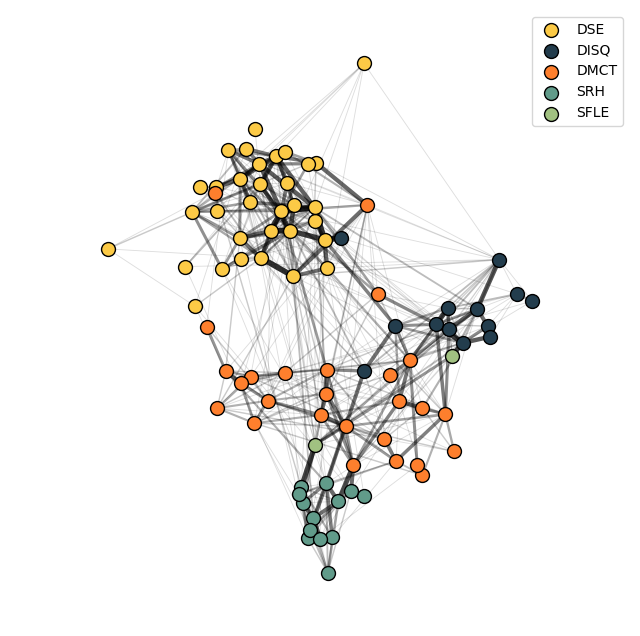

In [23]:
plot_with_nodeColorLabel(G1_LC, pos = FA2_position, save = 'Figures/FA2_G1_LC')

## Edge Curve

Based on the ForceAtlas2 layout shown above, purely for the purpose of making the figure more aesthetically pleasing, we could consider making the edges curved instead of straight. The following functions use the resource ["Curved Bezier edges in NetworkX"](https://github.com/beyondbeneath/bezier-curved-edges-networkx) from GitHub. 

In [24]:
import sys
sys.path.append('bezier-curved-edges-networkx')

from matplotlib.collections import LineCollection
from curved_edges import curved_edges

In [25]:
def plot_with_nodeColorLabel_curvedEdge(G, pos, save = False):
    
    fig = plt.figure(figsize=(8,8))

    edge_alpha = np.array(list(nx.get_edge_attributes(G,'weight').values()))
    edge_alpha = np.log(edge_alpha + 1); edge_alpha = edge_alpha/np.max(edge_alpha)
    
    # Produce the curves
    curves = curved_edges(G, pos, bezier_precision = 100, dist_ratio = 0.15) # dist_ratio controls how curved each edge is
    lc = LineCollection(curves, color='k', linewidth = edge_alpha * 5, alpha = edge_alpha)
    
    # Plot edge
    plt.gca().add_collection(lc)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    
    department_dict = nx.get_node_attributes(G, 'department')
    
    # Plot node
    for department in list(set(department_dict.values())):
        nodelist = [node for node in G.nodes if department_dict[node] == department]
        nx.draw_networkx_nodes(
            G, 
            node_color = get_node_department_color(department), 
            node_size = 100,
            nodelist = nodelist,
            linewidths = 1,
            edgecolors = 'k',
            alpha = 1, 
            pos = pos,
            label = department
        )
    
    plt.legend()
    plt.axis('equal');
    plt.axis('off');

    if save:
        plt.savefig(save, transparent = False) # save the figure

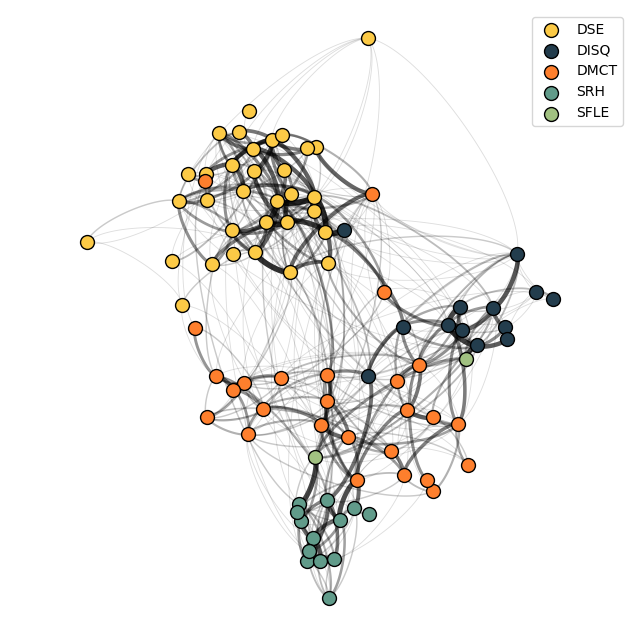

In [26]:
plot_with_nodeColorLabel_curvedEdge(G1_LC, pos = FA2_position, save = 'Figures/FA2_Curved_G1_LC.png')

#  Community Detection 

## Results Visualisation

Combined with the techniques mentioned above, we could also consider visualising the community detection results. 

### Permuted Adjacency Matrix [Recall]

Recall that in the last seminar, we used the permuted adjacency matrix to visualize the community detection results. The following is the result for G1.

In [27]:
import Modularity_Maximisation as MM

In [28]:
A1, A_perm1, A_asso1, A_perm_asso1, nMI_matrix1 = MM.aggregated_results(G1, n_runs = 100, resolution = 0.5)

In [29]:
import seaborn as sns
from matplotlib.colors import LogNorm, SymLogNorm

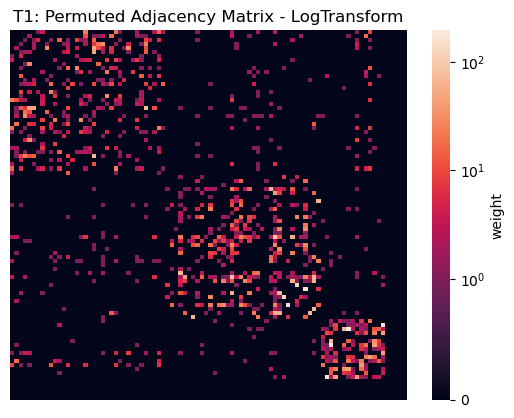

In [30]:
sns.heatmap(A_perm1, xticklabels = 0, yticklabels = 0, norm = SymLogNorm(1), cbar_kws={'label': 'weight'})
plt.title('T1: Permuted Adjacency Matrix - LogTransform')
plt.savefig('Figures/PAM_T1.png', transparent = False)

### Graph Visualisation

We simply assign different colors to nodes assigned to different communities. It would be interesting to investigate how different this partition is compared to the department in which each individual works. Notice that this figure only contains the nodes in the largest connected component of G1.

As shown in the figure below, the ForceAtlas layout well separates nodes from different communities. 

In [31]:
set(nx.get_node_attributes(G1, 'comm').values())

{0, 1, 2, 3, 4, 5, 6, 7}

In [32]:
def get_node_comm_color(comm):
    
    color_dict = {0: '#e8422b', 1: '#ff822b', 2: '#ffff00', 3: '#469d52', 4: '#009ee3', 5: '#454d9c', 6: '#782e6c', 7: '#d2669a'}
    
    return color_dict[comm]

In [33]:
def plot_with_commColorLabel_curvedEdge(G, pos, save = False):
    
    fig = plt.figure(figsize=(8,8))

    edge_alpha = np.array(list(nx.get_edge_attributes(G,'weight').values()))
    edge_alpha = np.log(edge_alpha + 1); edge_alpha = edge_alpha/np.max(edge_alpha)
    
    # Produce the curves
    curves = curved_edges(G, pos, bezier_precision = 100, dist_ratio = 0.12) # dist_ratio controls how curved each edge is
    lc = LineCollection(curves, color='k', linewidth = edge_alpha * 5, alpha = edge_alpha)
    
    # Plot edge
    plt.gca().add_collection(lc)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    
    comm_dict = nx.get_node_attributes(G, 'comm')
    
    # Plot node
    for comm in list(set(comm_dict.values())):
        nodelist = [node for node in G.nodes if comm_dict[node] == comm]
        nx.draw_networkx_nodes(
            G, 
            node_color = get_node_comm_color(comm), 
            node_size = 100,
            nodelist = nodelist,
            linewidths = 1,
            edgecolors = 'k',
            alpha = 1, 
            pos = pos,
            label = 'Community ' + str(comm)
        )
    
    plt.legend()
    plt.axis('equal');
    plt.axis('off');

    if save:
        plt.savefig(save, transparent = False) # save the figure

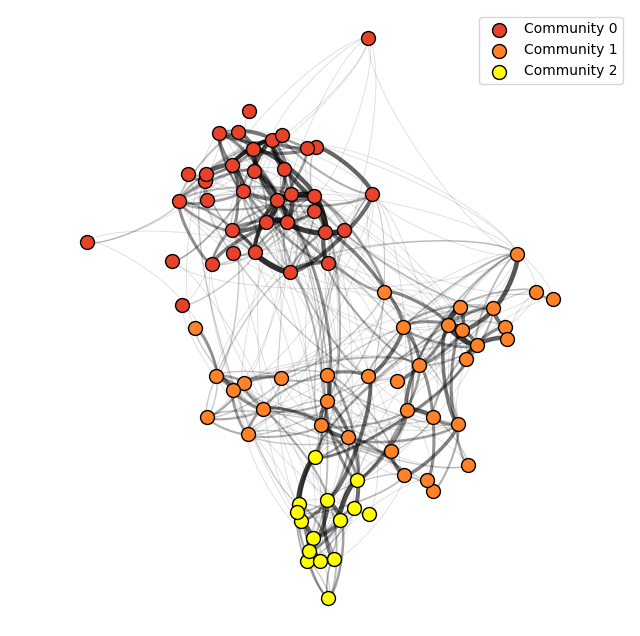

In [34]:
plot_with_commColorLabel_curvedEdge(G1_LC, pos = FA2_position, save = 'Figures/G1_comm.png')

### Gephi [Software]

If you wish to tweet the locations of nodes manually, [Gephi](https://gephi.org/) is a popular open-source software for network visualization and exploration that can handle this task. It also has the ability to display curved edges and perform basic community detection methods.

To import graphs into Gephi, we can export them in GEXF file format. However, it's important to note that GEXF files do not support attributes with string formats.

In [35]:
def convert_graph(G):
    department_dict = nx.get_node_attributes(G, 'department')
    convert_dict = {'DISQ': 0, 'DMCT': 1, 'DSE': 2, 'SFLE': 3, 'SRH': 4}
    
    new_G = G.copy()
    for node in new_G.nodes:
        new_G.nodes[node]['department'] = convert_dict[department_dict[node]]
    
    return new_G

In [36]:
new_G1 = convert_graph(G1); nx.write_gexf(new_G1, "Data/G1.gexf") 
new_G2 = convert_graph(G2); nx.write_gexf(new_G2, "Data/G2.gexf") 
new_G3 = convert_graph(G3); nx.write_gexf(new_G3, "Data/G3.gexf")

## Temporal Analysis

As we are studying a temporal dataset, it would be insteresting to compare community detection outcomes across various graphs.

Although we could examine the permuted adjacency matrix in each graph, this approach cannot fully capture the variation of node partition over time, such as how many nodes transition from community 1 in G1 to community 2 in G2. A Sankey diagram can compensate for this limitation and provide more comprehensive insights in this regard.

### Permuted Adjacency Matrix [Recall]

In [37]:
A2, A_perm2, A_asso2, A_perm_asso2, nMI_matrix2 = MM.aggregated_results(G2, n_runs = 100, resolution = 0.5)
A3, A_perm3, A_asso3, A_perm_asso3, nMI_matrix3 = MM.aggregated_results(G3, n_runs = 100, resolution = 0.5)

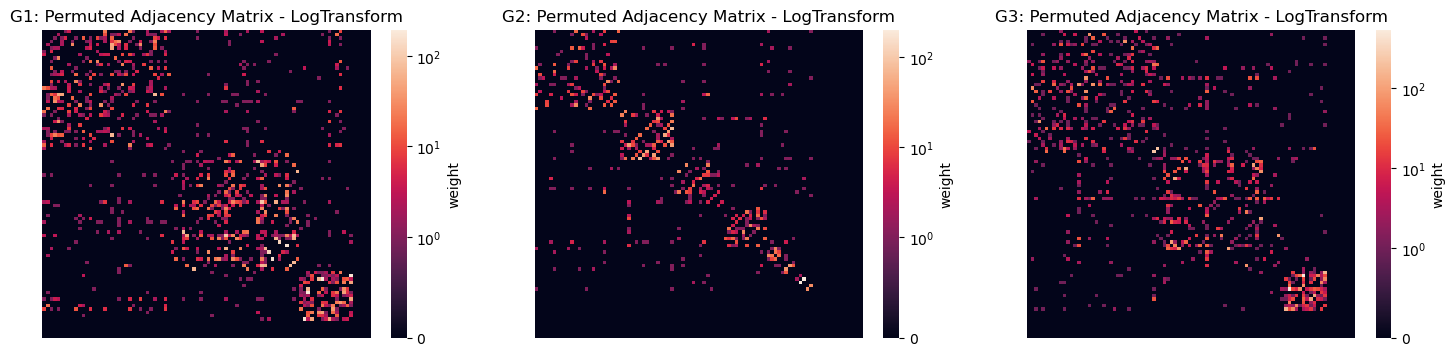

In [38]:
fig, axes = plt.subplots(1, 3, figsize = (18, 4))

sns.heatmap(A_perm1, xticklabels = 0, yticklabels = 0, ax = axes[0], norm = SymLogNorm(1), cbar_kws={'label': 'weight'})
axes[0].set_title('G1: Permuted Adjacency Matrix - LogTransform')

sns.heatmap(A_perm2, xticklabels = 0, yticklabels = 0, ax = axes[1], norm = SymLogNorm(1), cbar_kws={'label': 'weight'})
axes[1].set_title('G2: Permuted Adjacency Matrix - LogTransform')

sns.heatmap(A_perm3, xticklabels = 0, yticklabels = 0, ax = axes[2], norm = SymLogNorm(1), cbar_kws={'label': 'weight'})
axes[2].set_title('G3: Permuted Adjacency Matrix - LogTransform')

fig.savefig('Figures/PAM_Temporal.png', transparent = False)

### Sankey Diagram

These procedures are quite lengthy but easy to understand (others usually are not), following the instructions from this [GitHub repo](https://github.com/bhattbhavesh91/sankey-diagram-plotly-tutorial), which comes with a Youtube video. The resulting Sankey diagram is interactive and visually engaging.

In [39]:
import networkx.algorithms.community as nx_comm
def check_comm_num(G):
    comm_list = nx_comm.louvain_communities(G, resolution = 0.5, seed = 0)
    comm_list.sort(key=len, reverse = True) 
    print([len(comm) for comm in comm_list])

In [40]:
check_comm_num(G1); check_comm_num(G2); check_comm_num(G3)

[36, 36, 15, 1, 1, 1, 1, 1]
[24, 15, 14, 12, 4, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[36, 16, 15, 13, 4, 1, 1, 1, 1, 1, 1, 1, 1]


For simplicity, we focus on the largest 3, 4, 4 communities at in G1, G2 and G3 respectively, and call the remaining communities "Other Communities".

In [41]:
def get_assignment_list(G, max_num):
    assignment = np.array(list(nx.get_node_attributes(G, 'comm').values()))
    assignment[assignment >= max_num] = max_num
    return assignment

In [42]:
df = pd.DataFrame(list(zip(list(G1.nodes), get_assignment_list(G1, 3), get_assignment_list(G2, 4), get_assignment_list(G3, 4))), columns =['Index', 'G1', 'G2', 'G3'])

In [43]:
df

Index  G1  G2  G3
0     513   0   4   0
1      15   0   0   2
2      17   1   4   0
3      21   1   4   4
4     533   2   1   3
..    ...  ..  ..  ..
87    492   2   1   3
88    494   0   0   0
89    496   0   0   2
90    499   2   1   3
91    511   1   2   4

[92 rows x 4 columns]

In [44]:
df1 = df.groupby(['G1', 'G2'])['Index'].count().reset_index()
df1.columns = ['source', 'target', 'value']
df1['source'] = df1.source.map({0: 'G1: C1', 1: 'G1: C2', 2: 'G1: C3', 3: 'G1: Other Communities'})
df1['target'] = df1.target.map({0: 'G2: C1', 1: 'G2: C2', 2: 'G2: C3', 3: 'G2: C4', 4: 'G2: Other Communities'})


df2 = df.groupby(['G2', 'G3'])['Index'].count().reset_index()
df2.columns = ['source', 'target', 'value']
df2['source'] = df2.source.map({0: 'G2: C1', 1: 'G2: C2', 2: 'G2: C3', 3: 'G2: C4', 4: 'G2: Other Communities'})
df2['target'] = df2.target.map({0: 'G3: C1', 1: 'G3: C2', 2: 'G3: C3', 3: 'G3: C4', 4: 'G3: Other Communities'})

links = pd.concat([df1, df2], axis=0)

In [45]:
links

source                 target  value
0                  G1: C1                 G2: C1     22
1                  G1: C1                 G2: C2      1
2                  G1: C1                 G2: C3      1
3                  G1: C1                 G2: C4      1
4                  G1: C1  G2: Other Communities     11
5                  G1: C2                 G2: C1      1
6                  G1: C2                 G2: C2      1
7                  G1: C2                 G2: C3     13
8                  G1: C2                 G2: C4      9
9                  G1: C2  G2: Other Communities     12
10                 G1: C3                 G2: C2     13
11                 G1: C3  G2: Other Communities      2
12  G1: Other Communities                 G2: C1      1
13  G1: Other Communities                 G2: C4      2
14  G1: Other Communities  G2: Other Communities      2
0                  G2: C1                 G3: C1     14
1                  G2: C1                 G3: C3      9
2                  G2: C1  G3: Other Communities      1
3                  G2: C2                 G3: C1      2
4                  G2: C2                 G3: C3      1
5                  G2: C2                 G3: C4     12
6                  G2: C3                 G3: C1      8
7                  G2: C3                 G3: C2      4
8                  G2: C3  G3: Other Communities      2
9                  G2: C4                 G3: C2      9
10                 G2: C4                 G3: C3      1
11                 G2: C4  G3: Other Communities      2
12  G2: Other Communities                 G3: C1     12
13  G2: Other Communities                 G3: C2      3
14  G2: Other Communities                 G3: C3      4
15  G2: Other Communities                 G3: C4      1
16  G2: Other Communities  G3: Other Communities      7

In [46]:
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
unique_source_target

['G1: C1',
 'G1: C2',
 'G1: C3',
 'G1: Other Communities',
 'G2: C1',
 'G2: C2',
 'G2: C3',
 'G2: C4',
 'G2: Other Communities',
 'G3: C1',
 'G3: C3',
 'G3: Other Communities',
 'G3: C4',
 'G3: C2']

In [47]:
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
mapping_dict     

{'G1: C1': 0,
 'G1: C2': 1,
 'G1: C3': 2,
 'G1: Other Communities': 3,
 'G2: C1': 4,
 'G2: C2': 5,
 'G2: C3': 6,
 'G2: C4': 7,
 'G2: Other Communities': 8,
 'G3: C1': 9,
 'G3: C3': 10,
 'G3: Other Communities': 11,
 'G3: C4': 12,
 'G3: C2': 13}

In [48]:
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

In [49]:
links

source  target  value
0        0       4     22
1        0       5      1
2        0       6      1
3        0       7      1
4        0       8     11
5        1       4      1
6        1       5      1
7        1       6     13
8        1       7      9
9        1       8     12
10       2       5     13
11       2       8      2
12       3       4      1
13       3       7      2
14       3       8      2
0        4       9     14
1        4      10      9
2        4      11      1
3        5       9      2
4        5      10      1
5        5      12     12
6        6       9      8
7        6      13      4
8        6      11      2
9        7      13      9
10       7      10      1
11       7      11      2
12       8       9     12
13       8      13      3
14       8      10      4
15       8      12      1
16       8      11      7

In [50]:
links_dict = links.to_dict(orient='list')

In [51]:
color_dict = {
    0: '#333d29',
    1: '#414833',
    2: '#656d4a',
    3: '#a4ac86',
    4: '#87986a',
    5: '#97a97c',
    6: '#b5c99a',
    7: '#cfe1b9',
    8: '#e9f5db',
    9: '#6b705c',
    10: '#b7b7a4', # middle
    11: '#d3d3d3', # last
    12: '#b1a7a6',
    13: '#a5a58d',
}

Plotly Installation:`pip install plotly` 

In [53]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_source_target,
      color = list(color_dict.values()),
      # x, y are defined to adjust the order of nodes  
      x = np.array([0, 0, 0, 0, 0.3, 0.3, 0.3, 0.3, 0.3, 0.6, 0.6, 0.6, 0.6, 0.6]) + 0.01,
      y = [0.1, 0.2, 0.3, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5, 0.1, 0.3, 0.5, 0.4, 0.2]
    ),
    link = dict(
      source = links_dict['source'],
      target = links_dict['target'],
      value = links_dict["value"],
      color = [
                color_dict[i]
                for i in links_dict['source']
            ]
    ),
    arrangement="snap")])

fig.update_layout(title_text="Sankey Diagram: Temporal Analysis of Community Detection", font_size=10)
fig.show()   
fig.write_image("Figures/Sankey.png")